In [23]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [24]:
#@title Figure Settings
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/nma.mplstyle")

In [25]:
# @title Plotting Functions

def plot_MSE_poly_fits(mse_train, mse_test, max_order):
    """
        Plot the MSE values for various orders of polynomial fits on the same bar
        graph

    Args:
        mse_train (ndarray): an array of MSE values for each order of polynomial fit
        over the training data
    mse_test (ndarray): an array of MSE values for each order of polynomial fit
        over the test data
        max_order (scalar): max order of polynomial fit
    """
    fig, ax = plt.subplots()
    width = .35

    ax.bar(np.arange(max_order + 1) - width / 2, mse_train, width, label="train MSE")
    ax.bar(np.arange(max_order + 1) + width / 2, mse_test , width, label="test MSE")

    ax.legend()
    ax.set(xlabel='Polynomial order', ylabel='MSE', title ='Comparing polynomial fits');

In [31]:
# @title Helper functions

def ordinary_least_squares(x, y):
    """Ordinary least squares estimator for linear regression.

    Args:
        x (ndarray): design matrix of shape (n_samples, n_regressors)
        y (ndarray): vector of measurements of shape (n_samples)

    Returns:
        ndarray: estimated parameter values of shape (n_regressors)
    """

    return np.linalg.inv(x.T @ x) @ x.T @ y


def make_design_matrix(x, order):
    """Create the design matrix of inputs for use in polynomial regression

    Args:
        x (ndarray): input vector of shape (n_samples)
        order (scalar): polynomial regression order

    Returns:
        ndarray: design matrix for polynomial regression of shape (samples, order+1)
    """

    # Broadcast to shape (n x 1) so dimensions work
    if x.ndim == 1:
        x = x[:, None]

    #if x has more than one feature, we don't want multiple columns of ones so we assign
    # x^0 here
    design_matrix = np.ones((x.shape[0],1))

    # Loop through rest of degrees and stack columns
    for degree in range(1, order+1):
        design_matrix = np.hstack((design_matrix, x**degree))

    return design_matrix


def solve_poly_reg(x, y, max_order):
    """Fit a polynomial regression model for each order 0 through max_order.

    Args:
        x (ndarray): input vector of shape (n_samples)
        y (ndarray): vector of measurements of shape (n_samples)
        max_order (scalar): max order for polynomial fits

    Returns:
        dict: fitted weights for each polynomial model (dict key is order)
    """

    # Create a dictionary with polynomial order as keys, and np array of theta
    # (weights) as the values
    theta_hats = {}

    # Loop over polynomial orders from 0 through max_order
    for order in range(max_order+1):

        X = make_design_matrix(x, order)
        this_theta = ordinary_least_squares(X, y)

        theta_hats[order] = this_theta

    return theta_hats

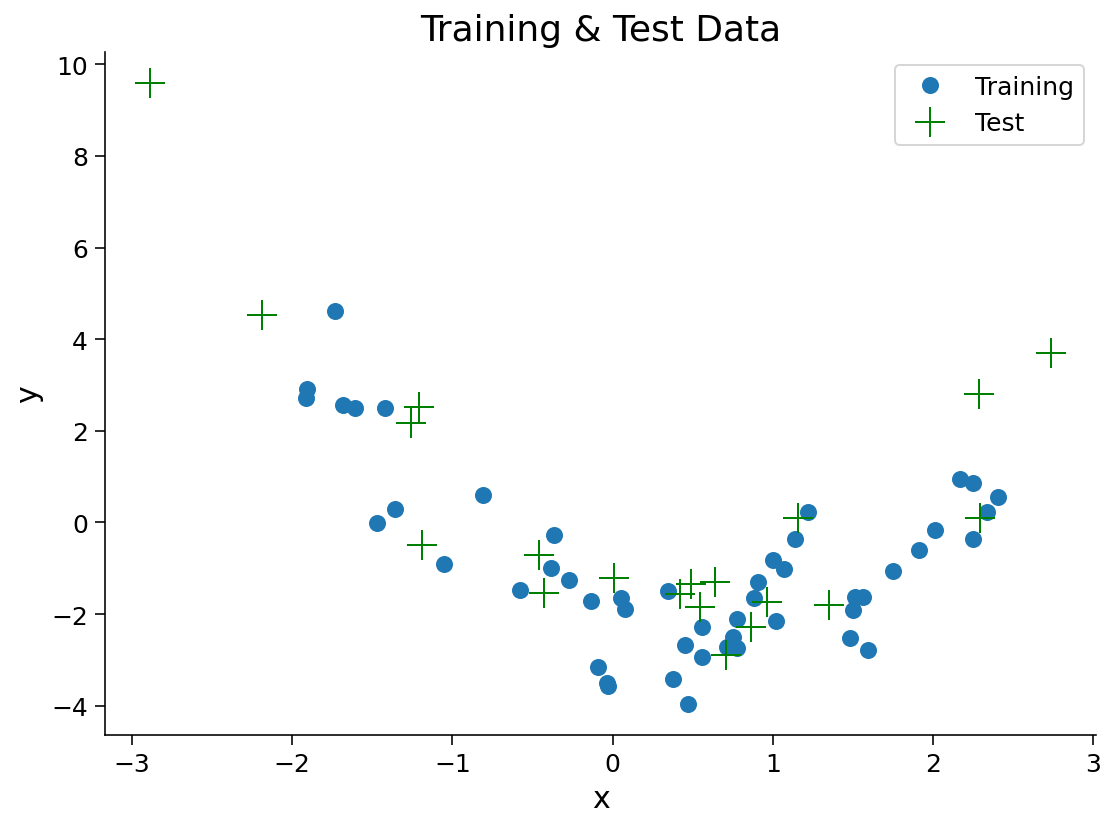

In [32]:
# @markdown Execute this cell to simulate both training and test data

### Generate training data
np.random.seed(0)
n_train_samples = 50
x_train = np.random.uniform(-2, 2.5, n_train_samples) # sample from a uniform distribution over [-2, 2.5)
noise = np.random.randn(n_train_samples) # sample from a standard normal distribution
y_train =  x_train**2 - x_train - 2 + noise

### Generate testing data
n_test_samples = 20
x_test = np.random.uniform(-3, 3, n_test_samples) # sample from a uniform distribution over [-2, 2.5)
noise = np.random.randn(n_test_samples) # sample from a standard normal distribution
y_test =  x_test**2 - x_test - 2 + noise

## Plot both train and test data
fig, ax = plt.subplots()
plt.title('Training & Test Data')
plt.plot(x_train, y_train, '.', markersize=15, label='Training')
plt.plot(x_test, y_test, 'g+', markersize=15, label='Test')
plt.legend()
plt.xlabel('x')
plt.ylabel('y');

In [33]:
# @markdown Execute this cell to estimate theta_hats
max_order = 5
theta_hats = solve_poly_reg(x_train, y_train, max_order)

In [34]:
# @markdown Execute this cell for function `evalute_poly_reg`

def evaluate_poly_reg(x, y, theta_hats, max_order):
    """ Evaluates MSE of polynomial regression models on data

    Args:
        x (ndarray): input vector of shape (n_samples)
        y (ndarray): vector of measurements of shape (n_samples)
        theta_hats (dict):  fitted weights for each polynomial model (dict key is order)
        max_order (scalar): max order of polynomial fit

    Returns
        (ndarray): mean squared error for each order, shape (max_order)
    """

    mse = np.zeros((max_order + 1))
    
    for order in range(0, max_order + 1):
        X_design = make_design_matrix(x, order)
        y_hat = np.dot(X_design, theta_hats[order])
        residuals = y - y_hat
        mse[order] = np.mean(residuals ** 2)

    return mse

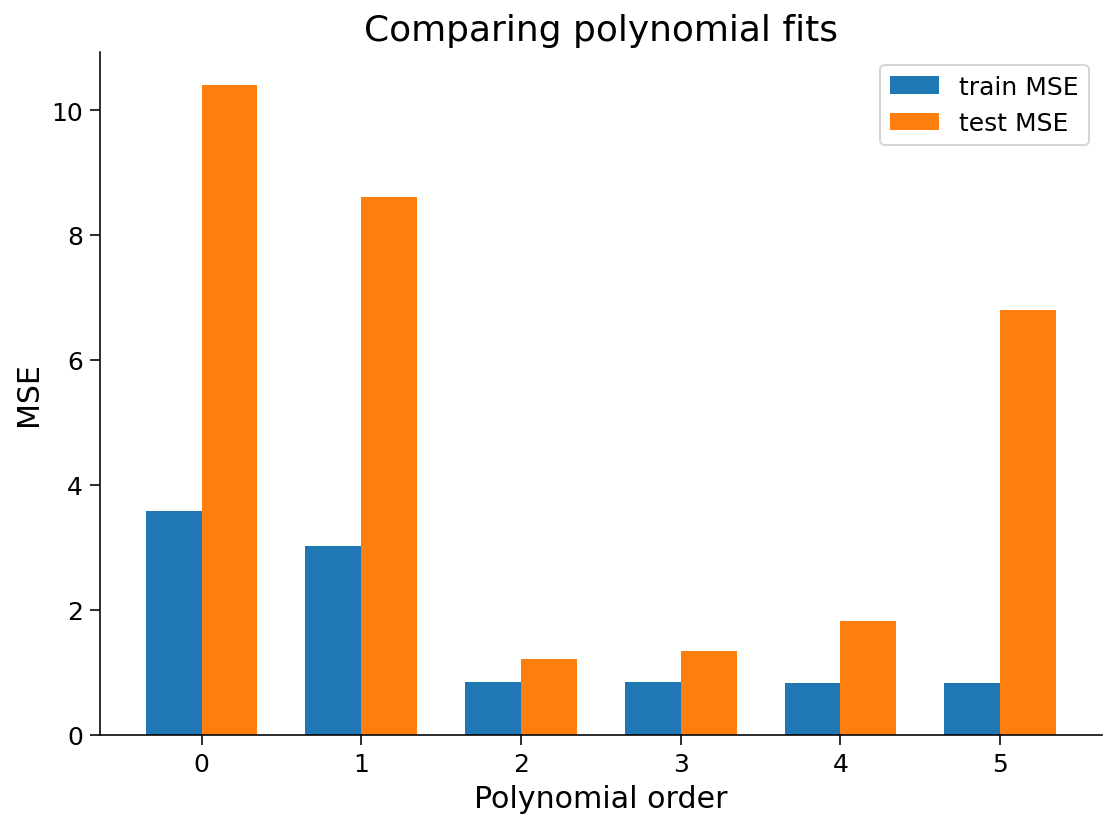

In [35]:
def compute_mse(x_train, x_test, y_train, y_test, theta_hats, max_order):
    """Compute MSE on training data and test data.

    Args:
        x_train(ndarray): training data input vector of shape (n_samples)
        x_test(ndarray): test data input vector of shape (n_samples)
        y_train(ndarray): training vector of measurements of shape (n_samples)
        y_test(ndarray): test vector of measurements of shape (n_samples)
        theta_hats(dict): fitted weights for each polynomial model (dict key is order)
        max_order (scalar): max order of polynomial fit

    Returns:
        ndarray, ndarray: MSE error on training data and test data for each order
    """

    #######################################################
    ## TODO for students: calculate mse error for both sets
    ## Hint: look back at tutorial 5 where we calculated MSE
    # Fill out function and remove
    #raise NotImplementedError("Student exercise: calculate mse for train and test set")
    #######################################################
    mse_train = evaluate_poly_reg(x_train, y_train, theta_hats, max_order)
    mse_test =  evaluate_poly_reg(x_test,y_test, theta_hats, max_order)

    return mse_train, mse_test


# Compute train and test MSE
mse_train, mse_test = compute_mse(x_train, x_test, y_train, y_test, theta_hats, max_order)

# Visualize
plot_MSE_poly_fits(mse_train, mse_test, max_order)